# Installing required libraries

In [ ]:
!pip install shap

In [ ]:
!pip install dice-ml

In [ ]:
!pip install interpret

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.impute import SimpleImputer

# Loading data from google drive

**Change value of path in next code block to required csv file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/water_potability.csv')
df.head()

Mounted at /content/drive


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [ ]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [ ]:
def checkPhRange(x):
    return (x<=8.5 and x>=6.5)

def checkSolidsRange(x):
    return x<=500

def checkHardnessRange(x):
    return x<=200

def checkChloraminesRange(x):
    return x<=4

def checkSulfateRange(x):
    return x<=250

def checkConductivityRange(x):
    return (x<=800 and x>=200)

def checkOrganicCarbonRange(x):
    return x<=25

def checkTrihalomethanesRange(x):
    return x<=80

def checkTurbidityRange(x):
    return x<=4

In [ ]:
print(f"pH: {df['ph'].apply(checkPhRange).sum()}")
print(f"solids: {df['Solids'].apply(checkSolidsRange).sum()}")
print(f"hardness: {df['Hardness'].apply(checkHardnessRange).sum()}")
print(f"chloramines: {df['Chloramines'].apply(checkChloraminesRange).sum()}")
print(f"sulfate: {df['Sulfate'].apply(checkSulfateRange).sum()}")
print(f"conductivity: {df['Conductivity'].apply(checkConductivityRange).sum()}")
print(f"organic carbon: {df['Organic_carbon'].apply(checkOrganicCarbonRange).sum()}")
print(f"trihalomethanes: {df['Trihalomethanes'].apply(checkTrihalomethanesRange).sum()}")
print(f"turbidity: {df['Turbidity'].apply(checkTurbidityRange).sum()}")

pH: 961
solids: 1
hardness: 1101
chloramines: 59
sulfate: 47
conductivity: 2011
organic carbon: 2010
trihalomethanes: 1623
turbidity: 1035


In [ ]:
columns = df.columns.tolist()

In [ ]:
def show_plot_for(name):
    print(name)
    sorted_vals = df[name].sort_values().values.tolist()

    potability_values = []

    for i in range(len(sorted_vals)):
        v = df.loc[df[name]==sorted_vals[i]]
        potability_values.append(v['Potability'].values[0])

    plt.figure(figsize=(30,5))
    plt.plot(sorted_vals,potability_values,'rx')
    plt.show()

ph


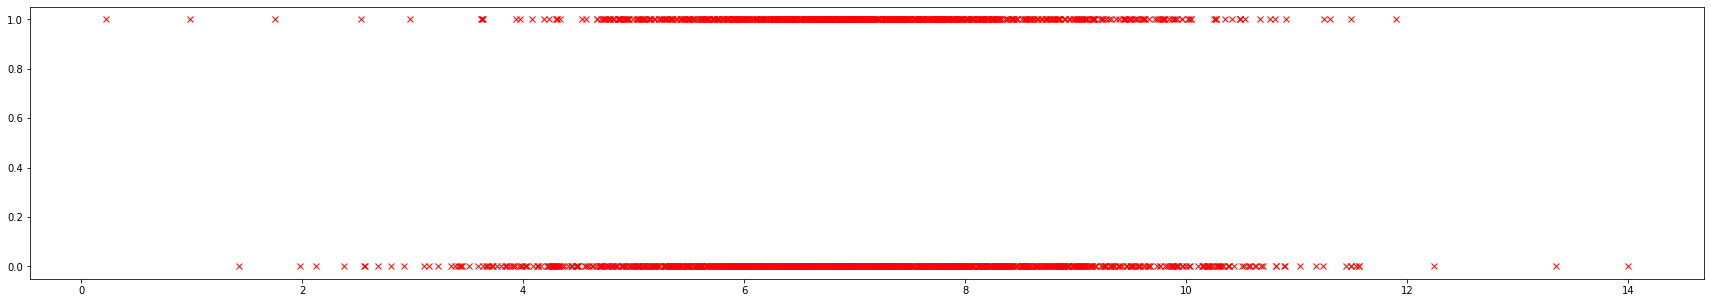

Hardness


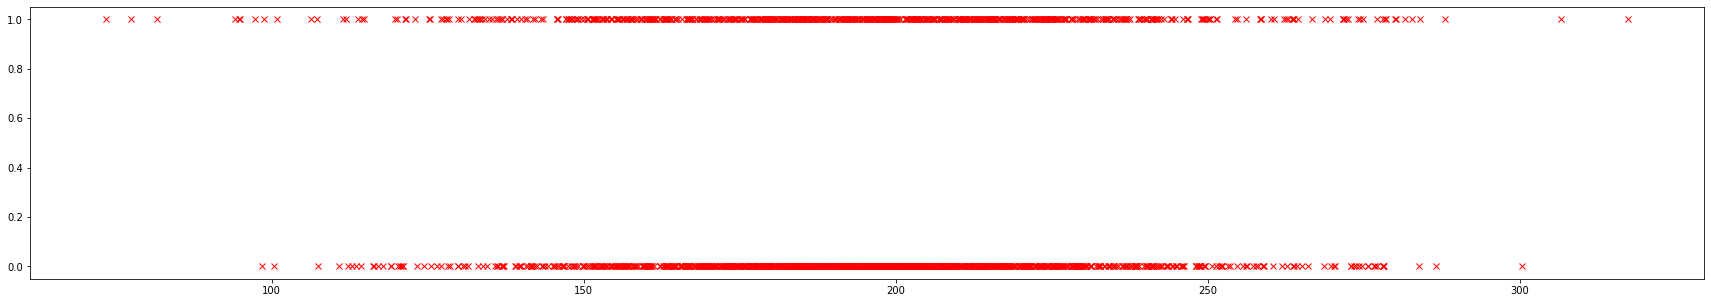

Solids


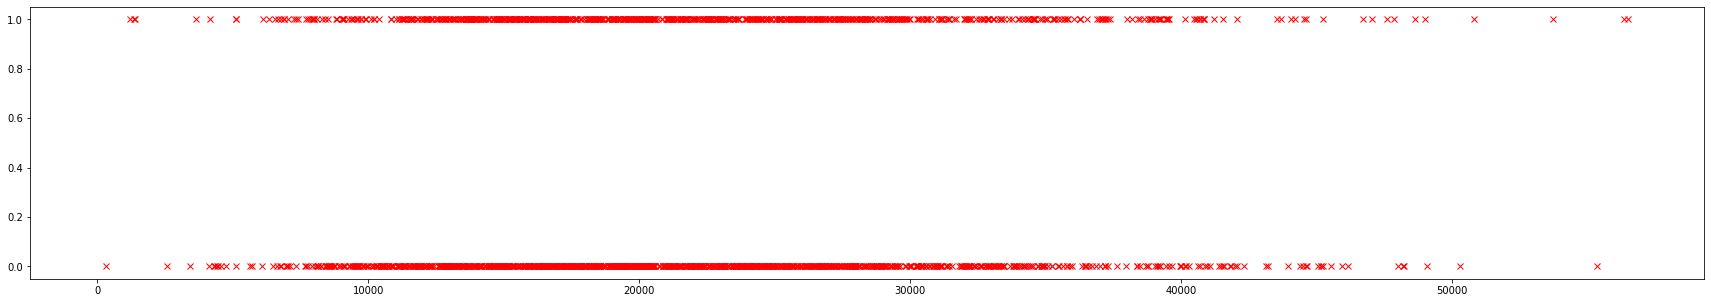

Chloramines


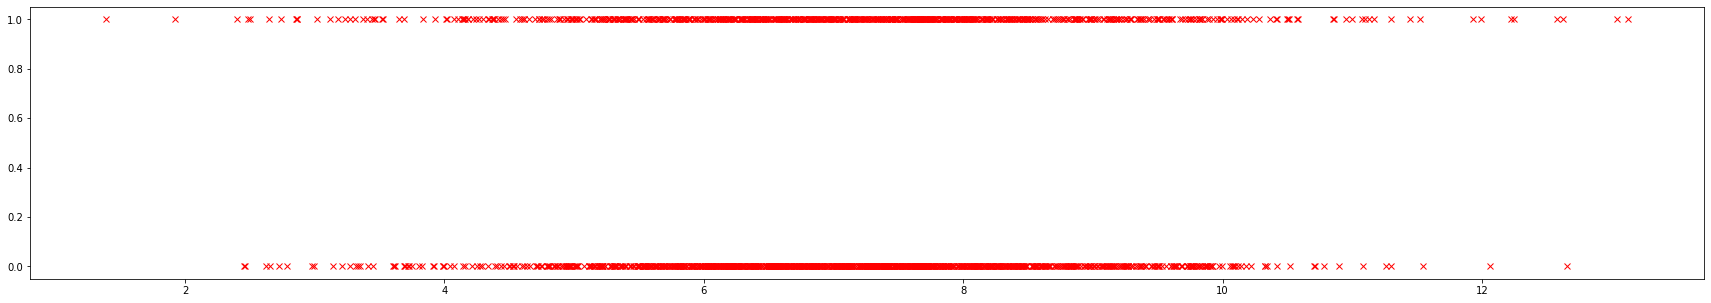

Sulfate


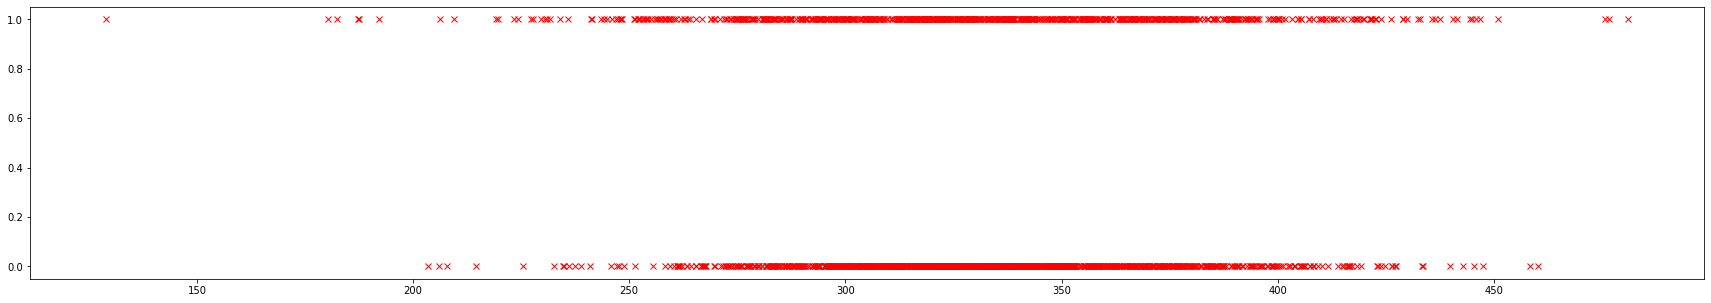

Conductivity


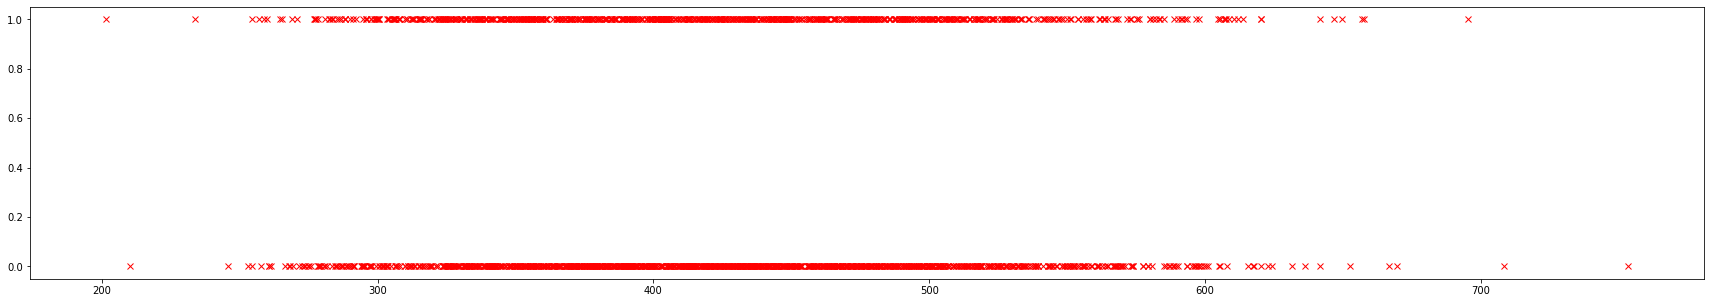

Organic_carbon


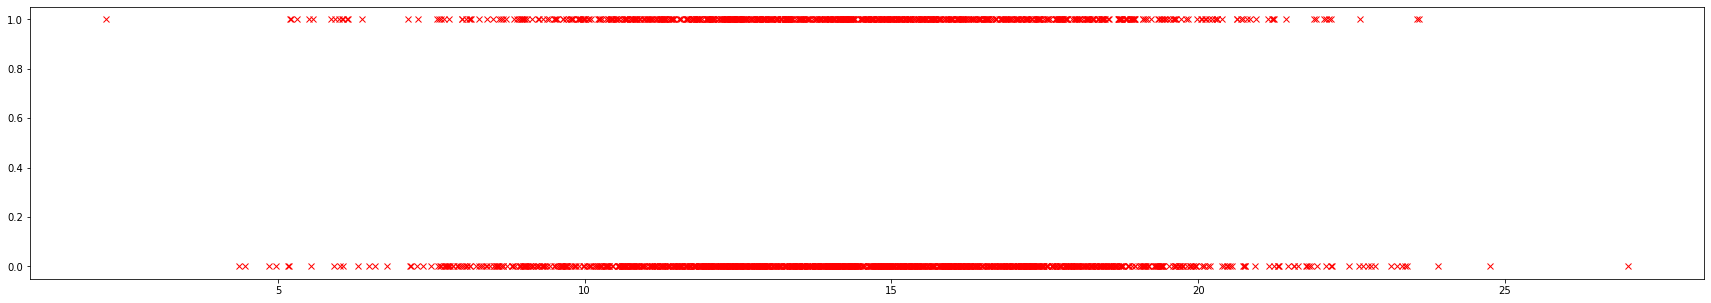

Trihalomethanes


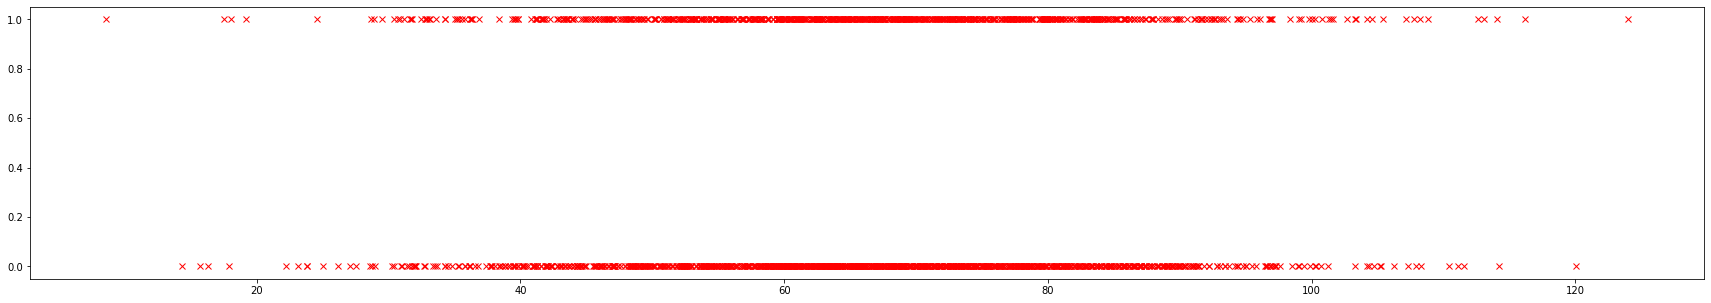

Turbidity


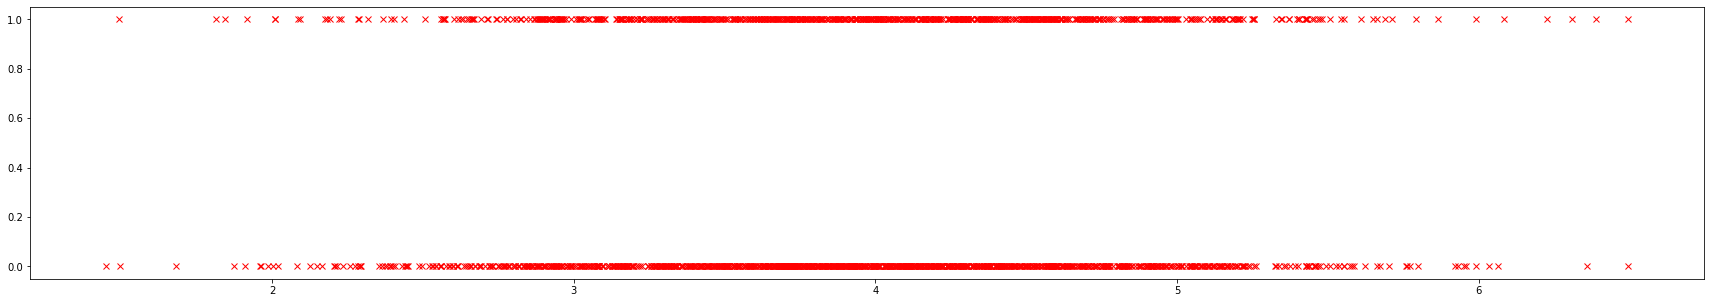

In [ ]:
for i in range(len(columns)-1):
    show_plot_for(columns[i])

# Data balancing

Balancing the data using resampler from sklearn

In [ ]:
zero  = df[df['Potability']==0]   
one = df[df['Potability']==1]  

from sklearn.utils import resample
from sklearn.utils import shuffle

df_minority_downsampled = resample(one, replace = True, n_samples = 800) 

df_low = pd.concat([zero, df_minority_downsampled])

df_low = shuffle(df_low)

df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 

df_high = pd.concat([zero, df_minority_upsampled])

df_high = shuffle(df_high)

Splitting the data for upsampled and downsampled data.

In [ ]:
X_low = df_low.drop(['Potability'], axis = 1)
y_low = df_low['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_low,y_low, test_size = 0.2)

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_leaf=3,random_state=23)

model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,pred)

print(accuracy)

pred_train = model.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train,pred_train)

print(train_accuracy)

matrix = confusion_matrix(y_test,pred)

0.8
0.991875


In [ ]:
linear_model = svm.SVC(kernel='poly')

linear_model.fit(X_train,y_train)
pred_linear = linear_model.predict(X_test)
accuracy_linear = metrics.accuracy_score(y_test,pred_linear)

print(accuracy_linear)

0.5725


In [ ]:
X_high = df_high.drop(['Potability'], axis = 1)
y_high = df_high['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_high,y_high, test_size = 0.2)

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_leaf=3,random_state=23)

model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,pred)

print(accuracy)

pred_train = model.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train,pred_train)

print(train_accuracy)

matrix = confusion_matrix(y_test,pred)

0.8166666666666667
0.9979166666666667


In [ ]:
linear_model = svm.SVC(kernel='poly')

linear_model.fit(X_train,y_train)
pred_linear = linear_model.predict(X_test)
accuracy_linear = metrics.accuracy_score(y_test,pred_linear)

print(accuracy_linear)

0.50625


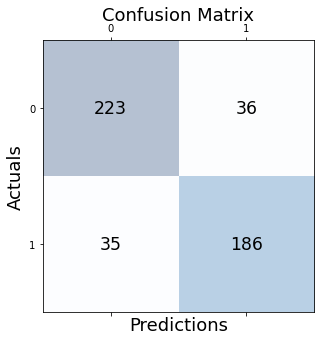

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### SHAP

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [ ]:
names = df.columns.to_list()
names.remove('Potability')
print(names)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
def show_shap_force_plot(ind):
    X_test.to_numpy()[ind]
    permissible = ['6.5-8.5',200,500,4,250,'200-800',25,80,4]
    dpnt = {'data':X_test.to_numpy()[ind],'permissible':permissible}
    pd.DataFrame(permissible,index=names,columns=['permissible'])
    print(pd.DataFrame(dpnt,index=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']))

    print(shap_values[1][ind].sum()+explainer.expected_value[1])
    print(f'Shap values for index {ind}: \n', shap_values[1][ind])
    print(explainer.expected_value[1])
    print(pred[ind],np.array(y_test)[ind])

In [ ]:
ind = 20
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1][ind,:],X_test.columns)

In [ ]:
show_shap_force_plot(ind)

                         data permissible
ph                   7.280560     6.5-8.5
Hardness           228.539543         200
Solids           29690.917158         500
Chloramines          7.871025           4
Sulfate            322.269661         250
Conductivity       392.532597     200-800
Organic_carbon      15.168189          25
Trihalomethanes     84.370713          80
Turbidity            2.919796           4
0.6379525613275615
Shap values for index 20: 
 [ 0.03506122  0.01959455  0.03770796  0.02108821 -0.01037887 -0.01707413
  0.02903603  0.02392976 -0.01173092]
0.5107187499999999
1 1


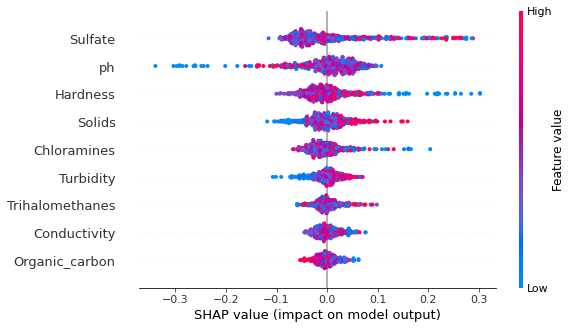

In [ ]:
shap.summary_plot(shap_values[1],X_test)

## LIME

In [ ]:
from interpret.blackbox import LimeTabular
from interpret import show

In [ ]:
lime = LimeTabular(predict_fn=model.predict_proba,data=X_train,random_state=1)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [ ]:
lime_local = lime.explain_local(X_test[0:30],y_test[0:30],name='LIME water potability explanation')

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

In [ ]:
show(lime_local)

Cloud environment detected (['colab', 'ipython']): viz integration is still experimental.


### Dice ML

In [ ]:
import dice_ml
from dice_ml.utils import helpers

In [ ]:
dice_data = dice_ml.Data(dataframe=df,
                         continuous_features=['Turbidity'],
                         outcome_name='Potability') 

In [ ]:
rf_dice = dice_ml.Model(model=model,backend='sklearn')

In [ ]:
explainer_dice = dice_ml.Dice(dice_data,rf_dice,method='random')

In [ ]:
input_data = X_test[24:25]


cf = explainer_dice.generate_counterfactuals(input_data,total_CFs=10,
                                        desired_class="opposite"
                                        )

cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

Query instance (original outcome : 0)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,5.433242,201.781246,31157.110167,7.286392,304.425275,451.557178,10.842095,87.634013,3.675718,0



Diverse Counterfactual set (new outcome: 1.0)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-,-,-,-,255.5446783507184,-,-,-,-,1.0
1,-,-,-,-,423.0459737672505,-,-,-,6.3723877,1.0
2,-,-,-,-,252.10892512246252,-,-,-,-,1.0
3,-,-,-,-,214.4608337745459,-,-,66.54219804427565,-,1.0
4,7.4132883405347805,-,-,-,-,-,-,-,5.9168297,1.0
5,-,-,-,-,423.0459737672505,-,-,-,-,1.0
6,8.515977267378878,-,-,-,252.23132963398223,-,-,-,-,1.0
7,-,-,-,3.998265840980654,-,518.0485235245408,-,-,-,1.0
8,7.97532990104869,149.12279412795087,-,-,-,-,-,-,-,1.0
9,7.736312841132024,-,-,-,-,-,-,-,3.283531,1.0


In [ ]:
input_data = X_test[24:25]

features_to_vary = ['Hardness','Solids','ph','Chloramines']

permitted_range = {'Turbidity':[0,4]}

cf = explainer_dice.generate_counterfactuals(input_data,total_CFs=5,
                                        desired_class="opposite",
                                        # permitted_range=permitted_range,
                                        features_to_vary=features_to_vary
                                        )

cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

Query instance (original outcome : 0)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,5.433242,201.781246,31157.110167,7.286392,304.425275,451.557178,10.842095,87.634013,3.675718,0



Diverse Counterfactual set (new outcome: 1.0)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.510943342127445,178.21731117902698,-,-,-,-,-,-,-,1.0
1,-,131.63517654759482,10571.770376968932,-,-,-,-,-,-,1.0
2,8.121253675568507,-,-,7.792593266848893,-,-,-,-,-,1.0
3,6.642755695262761,-,-,5.163931372998991,-,-,-,-,-,1.0
4,6.792125450218405,128.0966912100072,-,-,-,-,-,-,-,1.0


In [ ]:
input_data = X_test[23:24]

features_to_vary = ['Hardness','Solids','ph','Trihalomethanes']

permitted_range = {'Turbidity':[0,4]}

cf = explainer_dice.generate_counterfactuals(input_data,total_CFs=5,
                                        desired_class="opposite",
                                        # permitted_range=permitted_range,
                                        features_to_vary=features_to_vary
                                        )

cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

Query instance (original outcome : 0)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.581878,272.982745,37169.444404,8.114731,416.083481,351.476839,15.129334,79.261026,4.201663,0



Diverse Counterfactual set (new outcome: 1.0)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.137767883092494,-,17763.310992827992,-,-,-,-,-,-,1.0
1,7.752176212505221,-,15824.822709011038,-,-,-,-,-,-,1.0
2,7.657991236998258,-,21709.647708957324,-,-,-,-,-,-,1.0
3,-,240.9791037623137,18463.72212677624,-,-,-,-,-,-,1.0
4,-,-,26098.637956382463,-,-,-,-,56.31059225114748,-,1.0


In [ ]:
imp = explainer_dice.local_feature_importance(X_test[24:25], posthoc_sparsity_param=None)
print()
print(imp.local_importance)

100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


[{'ph': 0.5, 'Sulfate': 0.4, 'Chloramines': 0.3, 'Conductivity': 0.2, 'Hardness': 0.1, 'Solids': 0.1, 'Organic_carbon': 0.1, 'Trihalomethanes': 0.1, 'Turbidity': 0.1}]


In [ ]:
cobj = explainer_dice.global_feature_importance(X_test[0:550], total_CFs=10, posthoc_sparsity_param=None)
print()
print(cobj.summary_importance)

100%|██████████| 480/480 [01:53<00:00,  4.24it/s]



{'Sulfate': 0.3727083333333333, 'ph': 0.26375, 'Hardness': 0.21541666666666667, 'Solids': 0.17479166666666668, 'Chloramines': 0.16395833333333334, 'Turbidity': 0.13083333333333333, 'Trihalomethanes': 0.12354166666666666, 'Conductivity': 0.11583333333333333, 'Organic_carbon': 0.099375}


In [ ]:
feature_weights = {'Sulfate': 0.15, 'ph': 0.35, 'Hardness': 0.21, 'Solids': 0.07, 'Chloramines': 0.10, 'Turbidity': 0.13, 'Trihalomethanes': 0.1, 'Conductivity': 0.05, 'Organic_carbon': 0.09}

In [ ]:
dice_exp = explainer_dice.generate_counterfactuals(X_test[24:25], total_CFs=3, desired_class="opposite",
                                        # proximity_weight=1.5, 
                                        # diversity_weight=1.0
                                        )

dice_exp.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

Query instance (original outcome : 0)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,5.433242,201.781246,31157.110167,7.286392,304.425275,451.557178,10.842095,87.634013,3.675718,0



Diverse Counterfactual set (new outcome: 1.0)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-,-,-,6.7188296734823965,410.4592723125703,-,-,-,-,1.0
1,-,114.37145034033318,-,-,-,-,-,86.95746386587989,-,1.0
2,7.417823926645138,-,-,7.691454199173904,-,-,-,-,-,1.0
